# info awalan untuk mengetahui diabetes

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
diabetes_data=pd.read_csv('diabetes.csv')


In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# melihat hubungan Diabetes dengan data-data lainnya

In [22]:
from pandas_profiling import ProfileReport
profile = ProfileReport(diabetes_data, explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


kita bisa lihat disini jika rata-rata orang yang terkena diabetes yaitu  poin 1 adalah orang-orang yang kadar gula dararahnya 141, insulin yang tinggi dan umur 35+ 

In [7]:
import plotly.express as px
import pandas as pd

# Contoh diabetes_data (gunakan diabetes_data sebenarnya dari Anda)
diabetes_data = pd.read_csv('diabetes.csv')

# Membuat scatter plot interaktif
fig = px.scatter(diabetes_data, x='Glucose', y='BMI', color='Outcome', 
                 title='Glucose vs BMI berdasarkan Outcome',
                 labels={'Glucose': 'Kadar Glukosa', 'BMI': 'Indeks Massa Tubuh'},
                 hover_data=['Age', 'Pregnancies'])

# Menyimpan ke dalam file HTML
fig.write_html("glucose_bmi_interactive.html")

# Menampilkan plot
fig.show()

In [8]:

import plotly.express as px
import pandas as pd

# Membaca data
diabetes_data = pd.read_csv('diabetes.csv')

# Membuat bar chart untuk melihat distribusi Outcome
fig = px.bar(diabetes_data, x='Outcome', y='Glucose', 
             title='Rata-rata Glucose berdasarkan Outcome',
             labels={'Glucose': 'Rata-rata Glukosa', 'Outcome': 'Outcome'},
             color='Outcome',
             barmode='group')

fig.show()


In [9]:
import plotly.express as px

# Membuat violin chart untuk melihat distribusi BMI berdasarkan Outcome
fig = px.violin(diabetes_data, y='BMI', x='Outcome', 
                title='Distribusi BMI berdasarkan Outcome',
                labels={'BMI': 'Indeks Massa Tubuh', 'Outcome': 'Outcome'},
                color='Outcome', 
                box=True, points="all")

fig.show()


In [10]:
import plotly.express as px

# Membuat histogram untuk Glucose
fig = px.histogram(diabetes_data, x='Glucose', color='Outcome',
                   title='Distribusi Glucose berdasarkan Outcome',
                   labels={'Glucose': 'Kadar Glukosa', 'Outcome': 'Outcome'},
                   nbins=20, opacity=0.7)

fig.show()


In [33]:
from pycaret.classification import setup
# Example of a comprehensive setup in PyCaret
setup(
    data=diabetes_data,
    target='Outcome',
    train_size=0.8, # membagi data menjadi 80:20
    normalize=True, # normalisasi z score
    remove_outliers=True, # menghapus outlier
    outliers_threshold=0.05,
    fix_imbalance=True,
    session_id=2,
    verbose=False,
    
)

In [34]:
# Train Multiple Models: PyCaret memungkinkan Anda melatih berbagai macam model machine learning hanya dengan satu baris kode.
from pycaret.classification import compare_models
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:22:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7575,0.8322,0.6924,0.6473,0.6648,0.4762,0.4806,0.5400
ridge,Ridge Classifier,0.7541,0.8417,0.7442,0.6269,0.6771,0.4819,0.4901,0.2260
lda,Linear Discriminant Analysis,0.7541,0.8416,0.7442,0.6269,0.6771,0.4819,0.4901,0.2720
lr,Logistic Regression,0.7525,0.8407,0.7489,0.6228,0.6773,0.4802,0.4885,1.9400
gbc,Gradient Boosting Classifier,0.7509,0.8330,0.7260,0.6283,0.6688,0.4722,0.4802,0.5540
et,Extra Trees Classifier,0.7492,0.8284,0.6548,0.6417,0.6451,0.4520,0.4546,0.5050
nb,Naive Bayes,0.7395,0.8239,0.7208,0.6143,0.6588,0.4520,0.4596,0.2100
lightgbm,Light Gradient Boosting Machine,0.7379,0.8102,0.6695,0.6187,0.6382,0.4346,0.4394,0.4130
qda,Quadratic Discriminant Analysis,0.7361,0.8186,0.7113,0.6084,0.6525,0.4431,0.4498,0.3390
ada,Ada Boost Classifier,0.7215,0.7909,0.6688,0.5938,0.6244,0.4057,0.4115,0.4600


In [38]:

from pycaret.classification import setup, create_model, stack_models
# Melatih tiga model yang akan digabungkan
rf = create_model('rf')  # Random Forest
svm = create_model('svm')  # SVM dengan kernel linear
lr = create_model('lr')  # Logistic Regression
# Menggabungkan model dengan Stacking
stacked_model = stack_models(estimator_list=[rf, svm, lr], meta_model=create_model('lr'))



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7419,0.8250,0.5455,0.6667,0.6000,0.4123,0.4168
1,0.7742,0.8534,0.7727,0.6538,0.7083,0.5262,0.5311
2,0.7419,0.8415,0.7273,0.6154,0.6667,0.4585,0.4628
3,0.6935,0.7562,0.5455,0.5714,0.5581,0.3238,0.3240
4,0.8033,0.8518,0.6190,0.7647,0.6842,0.5436,0.5500
5,0.7377,0.8185,0.7619,0.5926,0.6667,0.4560,0.4658
6,0.7869,0.8595,0.7143,0.6818,0.6977,0.5333,0.5336
7,0.8033,0.8744,0.7619,0.6957,0.7273,0.5739,0.5754
8,0.6885,0.7512,0.7143,0.5357,0.6122,0.3607,0.3712


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6935,0.8125,0.6818,0.5556,0.6122,0.3632,0.3685
1,0.5161,0.6545,0.7273,0.4000,0.5161,0.1075,0.1273
2,0.7581,0.7966,0.7273,0.6400,0.6809,0.4873,0.4899
3,0.6452,0.7409,0.6364,0.5000,0.5600,0.2698,0.2753
4,0.6885,0.7643,0.5238,0.5500,0.5366,0.3022,0.3024
5,0.6557,0.6857,0.5238,0.5000,0.5116,0.2460,0.2462
6,0.7049,0.8107,0.7143,0.5556,0.6250,0.3880,0.3963
7,0.6885,0.8583,0.9524,0.5263,0.6780,0.4214,0.4925
8,0.6066,0.6345,0.6190,0.4483,0.5200,0.2009,0.2084


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7258,0.8341,0.5909,0.6190,0.6047,0.3949,0.3952
1,0.7903,0.8670,0.7727,0.6800,0.7234,0.5557,0.5586
2,0.7903,0.8761,0.7727,0.6800,0.7234,0.5557,0.5586
3,0.6935,0.7659,0.5909,0.5652,0.5778,0.3375,0.3377
4,0.7213,0.8036,0.6667,0.5833,0.6222,0.4030,0.4052
5,0.7049,0.8202,0.7619,0.5517,0.6400,0.4007,0.4157
6,0.8033,0.9167,0.8571,0.6667,0.7500,0.5920,0.6047
7,0.7869,0.8845,0.8571,0.6429,0.7347,0.5626,0.5789
8,0.6885,0.7810,0.8095,0.5312,0.6415,0.3864,0.4134


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7258,0.8341,0.5909,0.6190,0.6047,0.3949,0.3952
1,0.7903,0.8670,0.7727,0.6800,0.7234,0.5557,0.5586
2,0.7903,0.8761,0.7727,0.6800,0.7234,0.5557,0.5586
3,0.6935,0.7659,0.5909,0.5652,0.5778,0.3375,0.3377
4,0.7213,0.8036,0.6667,0.5833,0.6222,0.4030,0.4052
5,0.7049,0.8202,0.7619,0.5517,0.6400,0.4007,0.4157
6,0.8033,0.9167,0.8571,0.6667,0.7500,0.5920,0.6047
7,0.7869,0.8845,0.8571,0.6429,0.7347,0.5626,0.5789
8,0.6885,0.7810,0.8095,0.5312,0.6415,0.3864,0.4134


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7419,0.8409,0.5455,0.6667,0.6000,0.4123,0.4168
1,0.7742,0.8534,0.7273,0.6667,0.6957,0.5167,0.5179
2,0.7581,0.8466,0.7273,0.6400,0.6809,0.4873,0.4899
3,0.6935,0.7557,0.5000,0.5789,0.5366,0.3095,0.3114
4,0.7705,0.8333,0.5714,0.7059,0.6316,0.4676,0.4731
5,0.7377,0.8238,0.7619,0.5926,0.6667,0.4560,0.4658
6,0.7869,0.8857,0.7619,0.6667,0.7111,0.5435,0.5465
7,0.8033,0.8833,0.8095,0.6800,0.7391,0.5831,0.5889
8,0.7049,0.7500,0.7143,0.5556,0.6250,0.3880,0.3963


In [39]:
# Tune Model: PyCaret memiliki fungsi tune_model() yang secara otomatis mencari kombinasi hyperparameter terbaik untuk model Anda.
tuned_stacked_rf_model = tune_model(stacked_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7419,0.8284,0.5455,0.6667,0.6000,0.4123,0.4168
1,0.7742,0.8534,0.7273,0.6667,0.6957,0.5167,0.5179
2,0.7419,0.8420,0.7273,0.6154,0.6667,0.4585,0.4628
3,0.6774,0.7545,0.5000,0.5500,0.5238,0.2807,0.2815
4,0.8361,0.8429,0.6667,0.8235,0.7368,0.6197,0.6270
5,0.7541,0.8202,0.7619,0.6154,0.6809,0.4845,0.4918
6,0.7869,0.8702,0.7143,0.6818,0.6977,0.5333,0.5336
7,0.8197,0.8774,0.8095,0.7083,0.7556,0.6137,0.6171
8,0.7049,0.7464,0.7143,0.5556,0.6250,0.3880,0.3963


Fitting 10 folds for each of 10 candidates, totalling 100 fits


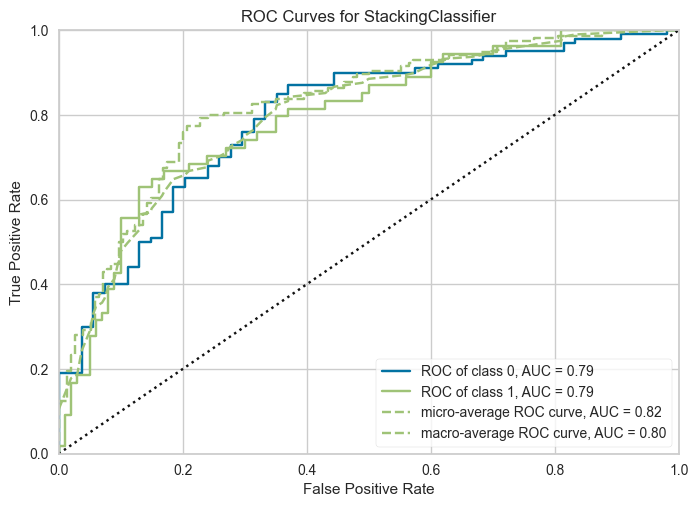

In [43]:
# Visualize Model Performance: Anda bisa memvisualisasikan berbagai metrik kinerja model, seperti ROC curve, confusion matrix, dll.
plot_model(tuned_stacked_rf_model, plot='auc')


bisa dilihat dari gambar ini bahwa nilai auc untuk kelas yang tidak terkena diabetes dan terkena diabetes adalah 0,79 yang artinya model ini memprediksi baik sebesar 79%.


apakah orang tersebut terkana diabetes atau tidak. rata-rata prediksi berkisar dari 80-82%

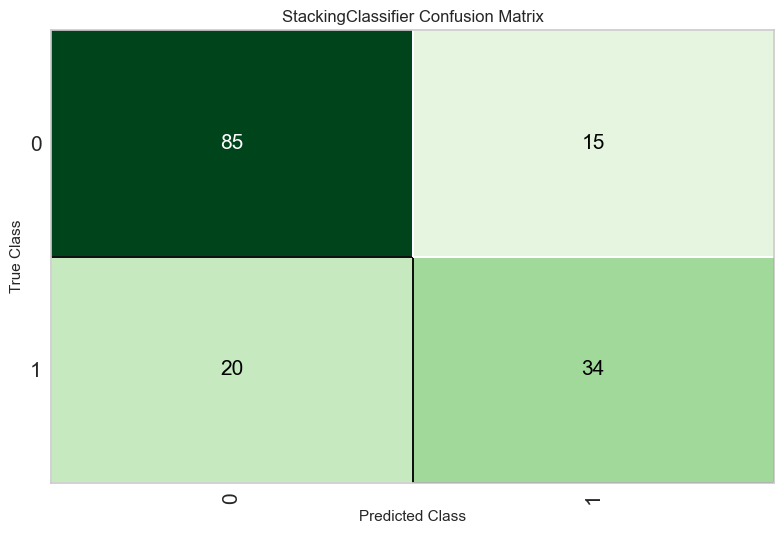

In [46]:
plot_model(tuned_stacked_rf_model, plot='confusion_matrix')

dari confusion matrix ini kita bisa menilai bahwa dari 110 yang diprediksi yaitu true negatif 85 di prediksi sebagai yang tidak terkena diabetes dan sesuai dengan dengan actualnya

lalu 15 false positif adalah kesalahan prediksi dimana 15 di prediksi sebagai orang terkena diabetes padahl tidak terkena diabetes

lalu 34 adalah prediksi dari true positif dimana di prediksi seseorang terkena diabetes 
namun 20 adalah false negatif yang dimana ada kesalahan prediksi dimana seseirang terkena diabtes hanya 20 

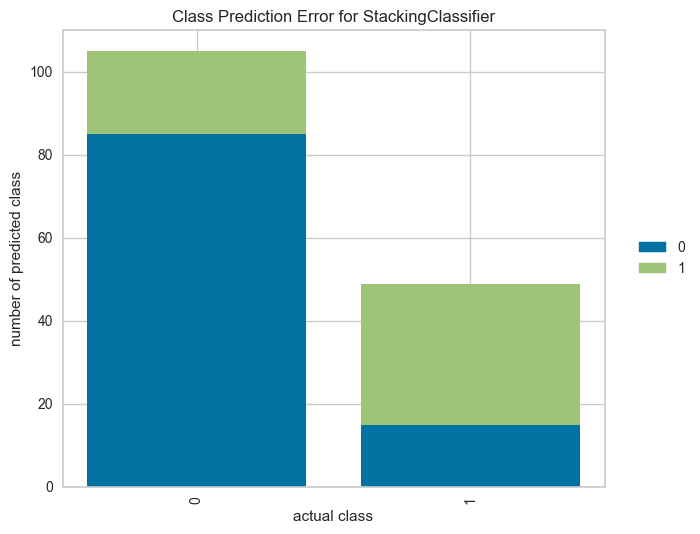

In [47]:
plot_model(tuned_stacked_rf_model, plot='error')

Kesimpulan dari Grafik:
Kinerja Model pada Kelas 0: Model tampaknya cukup baik dalam memprediksi kelas 0, karena sebagian besar prediksi pada kelas 0 adalah benar (ditunjukkan oleh bar biru tua yang lebih panjang). Namun, ada kesalahan klasifikasi di mana beberapa sampel kelas 0 salah diklasifikasikan sebagai kelas 1.

Kinerja Model pada Kelas 1: Model juga berhasil mengklasifikasikan banyak sampel dengan benar sebagai kelas 1 (ditunjukkan oleh bar hijau yang cukup panjang). Tetapi, model juga melakukan kesalahan dengan mengklasifikasikan beberapa sampel kelas 1 sebagai kelas 0.

Overlapping: Jika ada banyak overlapping antara bar hijau dan biru di setiap kelas, itu berarti model memiliki banyak kesalahan klasifikasi, yang menunjukkan bahwa model tersebut mungkin masih perlu perbaikan.

Kesimpulan Utama:
Grafik ini menunjukkan seberapa sering model membuat kesalahan dalam memprediksi kelas dari data uji.
Tinggi bar hijau di atas kelas 0 dan bar biru tua di atas kelas 1 menunjukkan jumlah kesalahan yang dibuat oleh model.
Tinggi bar hijau di kelas 1 dan biru tua di kelas 0 menunjukkan prediksi yang benar oleh model.